In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy import signal
#https://kluedo.ub.uni-kl.de/frontdoor/deliver/index/docId/4293/file/exact_fft_measurements.pdf
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

xLabel = 'Frequency (MHz)'
yLabel = 'Power (dBm)'

In [2]:
df = pd.read_csv('Waveform Capture.csv.gz')
numberSamples = len(df)
minSampleTime = df['Timestamp'].min()
maxSampleTime = df['Timestamp'].max()
voltageData = df['CHANnel1 Data'].to_numpy()

In [3]:
#Create the Frequencies to Plot
fftFreq = fftfreq(numberSamples, (maxSampleTime - minSampleTime) / numberSamples) / 1E6
i = fftFreq >= 0

In [4]:
#Rectangle Window
twosidedFFT = (1 / numberSamples) * abs(fft(voltageData))                                     
onesidedFFT  = 2 * twosidedFFT                                                              
powerFFT = onesidedFFT ** 2                                                                
powerFFTdBm = 10 * np.log10(10 * powerFFT)                                         

In [5]:
#Hanning Window, Needs +6 dBm 
voltageDataWindowed = signal.windows.hann(numberSamples) * voltageData                      
twosidedFFT = (1 / numberSamples) * abs(fft(voltageDataWindowed))
onesidedFFT  = 2 * twosidedFFT
powerFFT = onesidedFFT ** 2
powerFFTdBmWindowed = 10 * np.log10(10 * powerFFT)
powerFFTdBmWindowed[np.where(powerFFTdBmWindowed==np.max(powerFFTdBmWindowed))] += 6.02     #CPG Adjustment

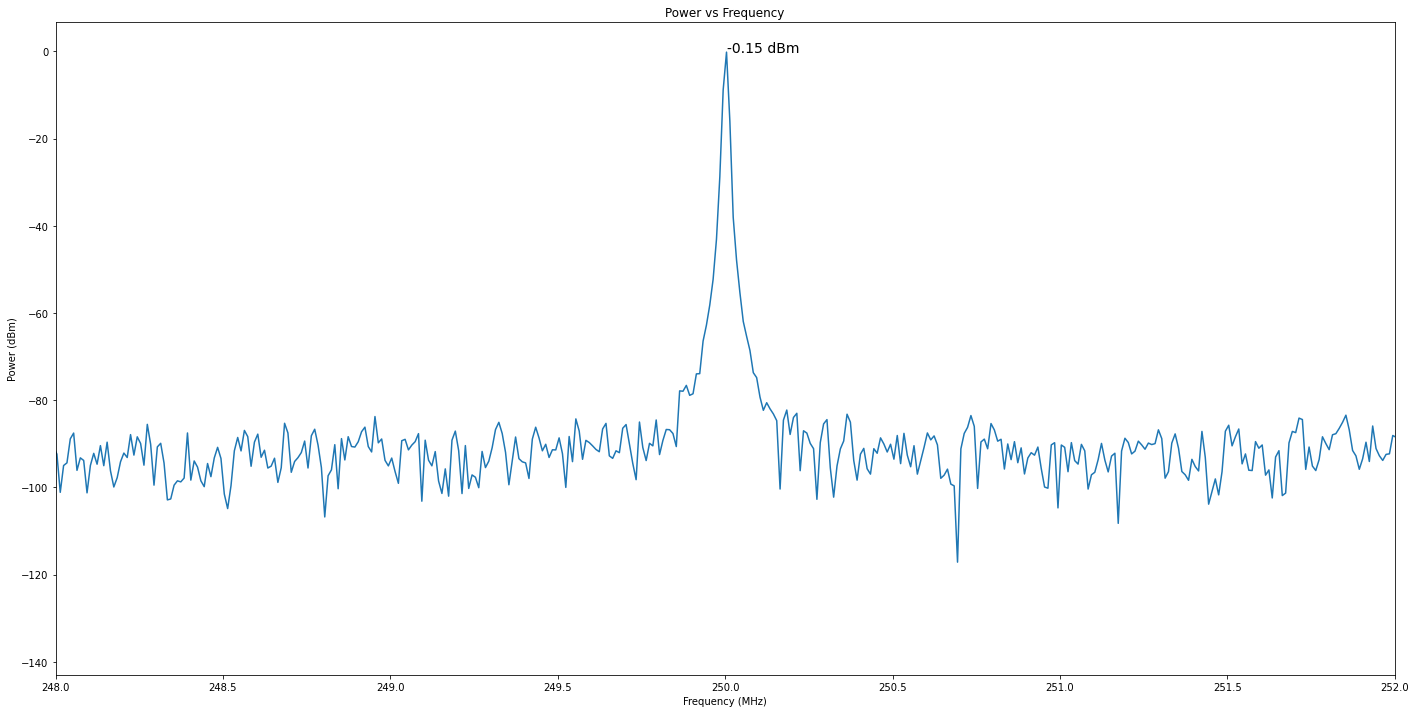

In [15]:
from matplotlib import pyplot as plt

peaks = signal.find_peaks(powerFFTdBmWindowed[i], height = -20)


plt.figure(figsize = (24,12))
plt.plot(fftFreq[i], powerFFTdBmWindowed[i])
plt.xlim(248,252)
plt.xlabel(xLabel)
plt.ylabel(yLabel)
plt.title('Power vs Frequency')
#plt.plot(fftFreq[peaks[0][0]], powerFFTdBmWindowed[peaks[0][0]], marker = 7, markersize=20)
plt.annotate(f'{round(powerFFTdBmWindowed[peaks[0][0]], 3)} dBm', xy = (fftFreq[peaks[0][0]], powerFFTdBmWindowed[peaks[0][0]]), size = 14)
#plt.plot(np.zeros_like(powerFFTdBmWindowed), "--", color="gray")
plt.show()

In [7]:
#Create Dataframe of the FFT Data
freqFrame = pd.DataFrame(fftFreq, columns = [xLabel])
dbmFrame = pd.DataFrame(powerFFTdBmWindowed, columns = [yLabel])
fftFrame = freqFrame.join(dbmFrame)

In [8]:
fftFrame.loc[fftFrame['Power (dBm)'].idxmax()]

Frequency (MHz)    250.004000
Power (dBm)         -0.149795
Name: 25000, dtype: float64